In [1]:
# Install necessary libraries
!pip install diffusers
!pip install transformers
!pip install Pillow
!pip install accelerate scipy safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

What would you like to generate today?(Enter 'Exit' to end the conversation.)

You: A futuristic cyberpunk city at night, illuminated by neon lights, flying cars zooming between skyscrapers, with a neon-lit marketplace filled with robotic vendors and augmented humans.


  0%|          | 0/50 [00:00<?, ?it/s]

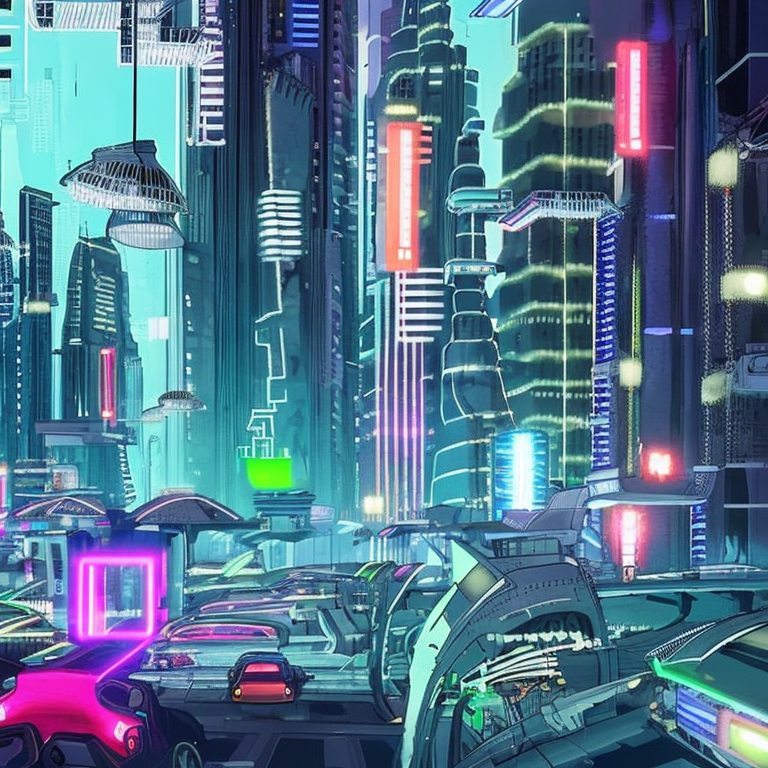

You: A medieval castle floating in the sky, surrounded by waterfalls and clouds, with glowing runes embedded in its stone walls and a dragon soaring nearby.


  0%|          | 0/50 [00:00<?, ?it/s]

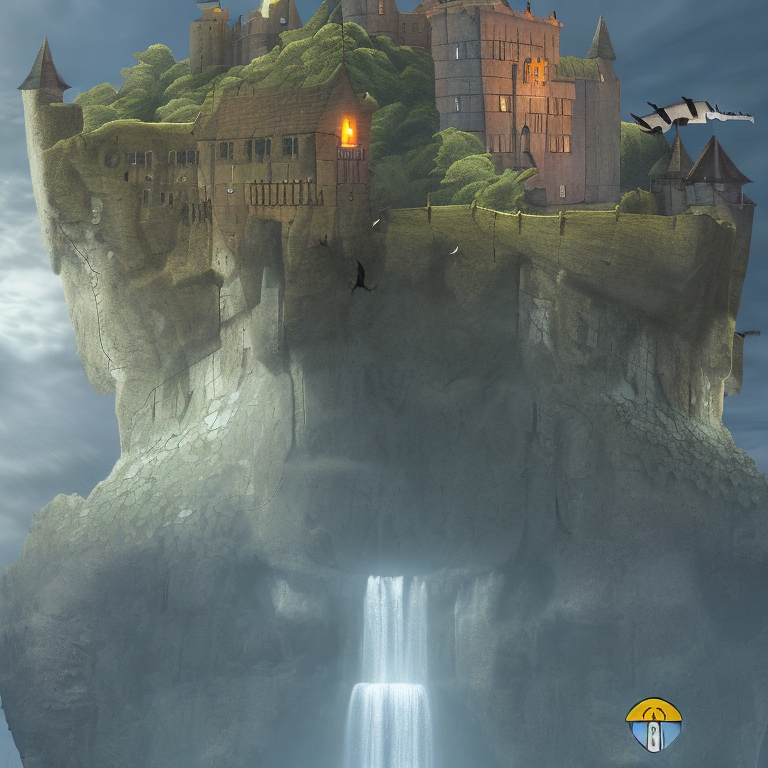

You: A serene Japanese garden during autumn, with red maple leaves falling, a small wooden bridge over a koi pond, and a samurai meditating under a cherry blossom tree.


  0%|          | 0/50 [00:00<?, ?it/s]

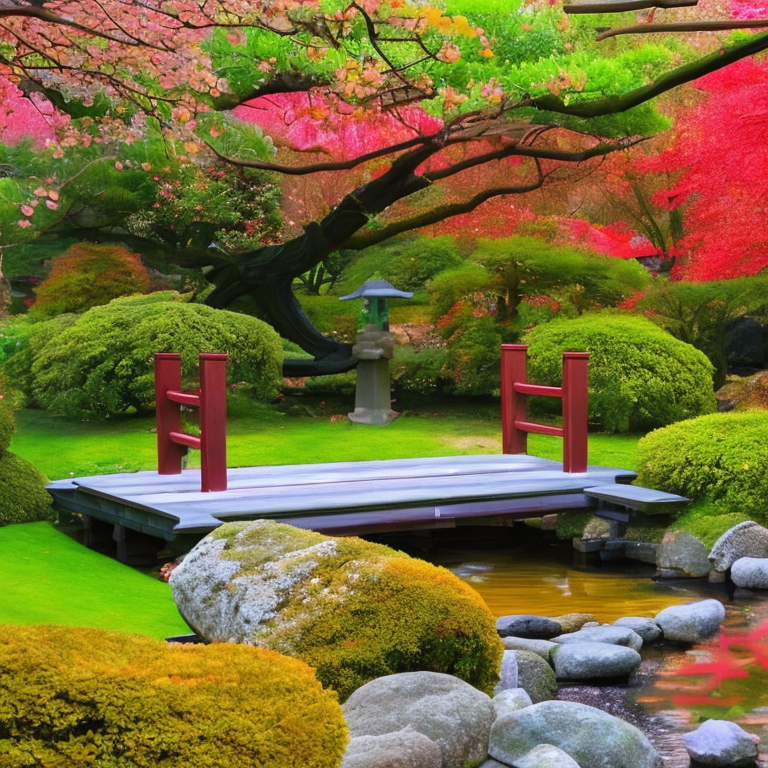

You: A post-apocalyptic wasteland with overgrown vegetation reclaiming abandoned skyscrapers, rusted cars on cracked highways, and a lone survivor wearing high-tech armor exploring the ruins.


  0%|          | 0/50 [00:00<?, ?it/s]

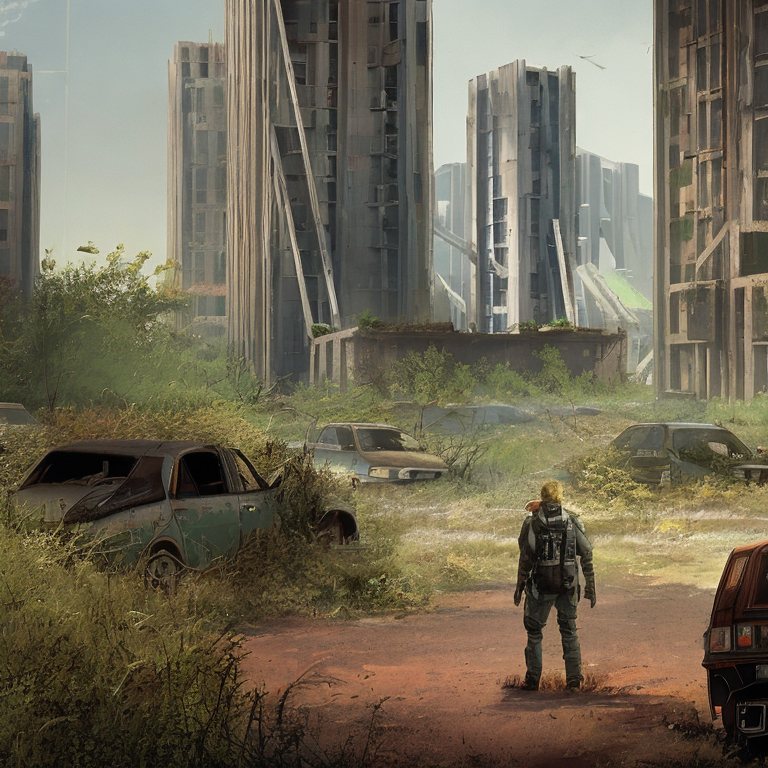

You: An alien planet with bioluminescent forests, towering crystal formations, and strange creatures with glowing eyes wandering under a sky filled with twin moons.


  0%|          | 0/50 [00:00<?, ?it/s]

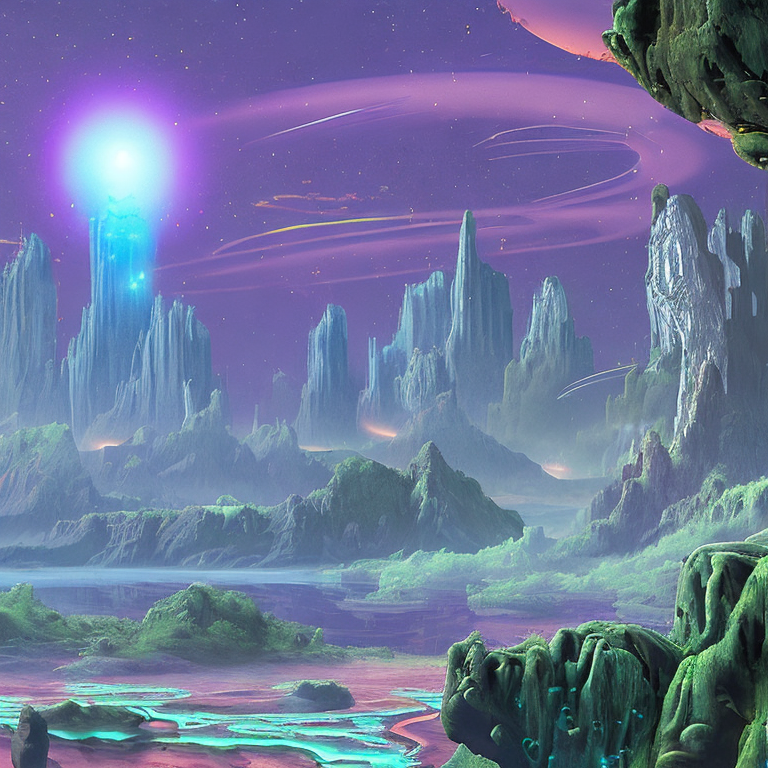

You: Exit
Bye 👋


In [2]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1"
)

pipeline = pipeline.to('cuda')

def chat():
  print("What would you like to generate today?(Enter 'Exit' to end the conversation.)\n")
  while True:
    prompt = input("You: ")
    if prompt.lower() == 'exit':
      print("Bye 👋")
      break
    image = pipeline(prompt=prompt).images[0]
    image.show()
    display(image)

chat()